In [1]:
#Import the Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = "C:/Users/parth/Desktop/Git/Projects/Titanic/"

In [7]:
#Read the Train file and save it as Pandas DataFrame
train_df = pd.read_csv(path+"train.csv")

#This will show the initial rows of Train Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Read the Test file and save it as Pandas DataFrame
test_df = pd.read_csv(path+"test.csv")

#This will show the initial rows of Train Data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#Add None Data to a new Survived column in Test Data
test_df['Survived'] = [None]*418

##Join Train and Test Data to form Combine Data Frame
combine_df = pd.concat([train_df,test_df], axis = 0)

print(combine_df.info())
combine_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB
None


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [10]:
selected_Columns = combine_df.columns.values.tolist()

## Survived is the column we will predict and Passanger Id is not of much significance. So, we will remove these two.
selected_Columns.remove('Survived')
selected_Columns.remove('PassengerId')
print(selected_Columns)

['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket']


In [11]:
combine_df['FamilySize'] = 1+ combine_df['Parch'] + combine_df['SibSp']

train_df['Parch'].ix[train_df['Parch']>2] = 3
combine_df['Parch'].ix[combine_df['Parch']>2] = 3

train_df['SibSp'].ix[train_df['SibSp']>3] = 4
combine_df['SibSp'].ix[combine_df['SibSp']>3] = 4

train_df['Fare'].ix[train_df['Fare']>151] = 152
combine_df['Fare'].ix[combine_df['Fare']>151] = 152

temp_df = combine_df[(combine_df['Pclass']==3) & (combine_df['Sex']=='male') & 
                     (combine_df['Embarked']=='S') & (combine_df['Age'] > 50)]
combine_df['Fare'][combine_df['Fare'].isnull()] = temp_df['Fare'].mean()

combine_df['Embarked'][(combine_df['Cabin']=='B28')] = 'S'

import re

#A function to get the title from a name.
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = combine_df["Name"].apply(get_title)
#print(pd.value_counts(titles))

combine_df['titles'] = titles
#print(combine_df.titles.unique())

MrList = ['Rev','Dr','Col','Major','Sir','Jonkheer','Don','Capt']
MsList = ['Ms','Mlle']
MrsList = ['Lady','Mme','Dona','Countess']

for ind, row in combine_df.iterrows():
    if row['titles'] in MrList:
        #row['titles'] = 'Mr'
        #print(combine_df.at[ind,'titles'])
        combine_df.at[ind,'titles'] = 'Mr'
    if row['titles'] in MsList:
        combine_df.at[ind,'titles'] = 'Miss'
    if row['titles'] in MrsList:
        combine_df.at[ind,'titles'] = 'Mrs'

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
##Replace with the Mean Value
combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                & (combine_df['Age'].isnull())] = combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                       & (combine_df['Age'].notnull())].mean()
def imputeMrsAge(cls):
    ##Replace with the Mean Value
    combine_df['Age'][(combine_df['Pclass'] == cls) & (combine_df['titles'] == 'Mrs')
                & (combine_df['Age'].isnull())] = combine_df['Age'][(combine_df['Pclass'] == cls)&(combine_df['titles'] == 'Mrs')
                       & (combine_df['Age'].notnull())].mean()

imputeMrsAge(1)
imputeMrsAge(2)
imputeMrsAge(3)

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Parch','Pclass','Sex','SibSp',"titles","FamilySize"]

for col in cat_vars:
    combine_df[col]=labelEnc.fit_transform(combine_df[col])
    
combine_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,titles
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0,A/5 21171,1,2
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1,PC 17599,1,3
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1,STON/O2. 3101282,0,1
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1,113803,1,3
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0,373450,0,2


In [14]:
ageFeatures = ['Embarked','Pclass','Sex',"titles","FamilySize",'Fare']

trainAgeF = (combine_df[combine_df['Age'].notnull()])[ageFeatures]
trainAgeL = (combine_df[combine_df['Age'].notnull()])['Age']
testAgeF = (combine_df[combine_df['Age'].isnull()])[ageFeatures]

from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rtr.fit(trainAgeF, trainAgeL)

# Use the fitted model to predict the missing values
predictedAges = rtr.predict(testAgeF)

##Replace the NA values with the predicted values
combine_df['Age'][combine_df['Age'].isnull()] = predictedAges

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
combine_df[combine_df['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,titles


In [16]:
combine_df.loc[ combine_df['Fare'] <= 7.91, 'Fare'] = 0
combine_df.loc[(combine_df['Fare'] > 7.91) & (combine_df['Fare'] <= 14.454), 'Fare'] = 1
combine_df.loc[(combine_df['Fare'] > 14.454) & (combine_df['Fare'] <= 31), 'Fare']   = 2
combine_df.loc[ combine_df['Fare'] > 31, 'Fare']   = 3
combine_df['Fare'] = combine_df['Fare'].astype(int)

combine_df.loc[ combine_df['Age'] <= 16, 'Age']= 0
combine_df.loc[(combine_df['Age'] > 16) & (combine_df['Age'] <= 32), 'Age'] = 1
combine_df.loc[(combine_df['Age'] > 32) & (combine_df['Age'] <= 48), 'Age'] = 2
combine_df.loc[(combine_df['Age'] > 48) & (combine_df['Age'] <= 64), 'Age'] = 3
combine_df.loc[ combine_df['Age'] > 64, 'Age'] = 4    

In [78]:
Features = ['Embarked','Pclass','Sex',"titles",'Age','Fare']

In [79]:
#from sklearn.cross_validation import train_test_split

Train = combine_df[combine_df['Survived'].notnull()]
Test = combine_df[combine_df['Survived'].isnull()]

train_x = Train[Features]
train_y = pd.DataFrame(Train['Survived'])
test_x = Test[Features]

In [80]:
train_x_arr = np.array(train_x.values)
train_y_arr = np.array(train_y.Survived.values.tolist())

test_x_arr = np.array(test_x.values)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(knn, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(train_x_arr, train_y_arr)
print('\nSequential Forward Selection (k=4):')
print(sfs1.k_feature_idx_)

print('CV Score:')
print(sfs1.k_score_)


Sequential Forward Selection (k=4):
(1, 2, 4, 6)
CV Score:
0.835016835017



[2017-04-27 23:40:31] Features: 1/4 -- score: 0.786756453423
[2017-04-27 23:40:31] Features: 2/4 -- score: 0.803591470258
[2017-04-27 23:40:31] Features: 3/4 -- score: 0.828282828283
[2017-04-27 23:40:31] Features: 4/4 -- score: 0.835016835017

In [82]:
import hyperopt.tpe
import hpsklearn
import hpsklearn.demo_support

estimator = hpsklearn.HyperoptEstimator(
    preprocessing=hpsklearn.components.any_preprocessing('pp'),
    classifier=hpsklearn.components.any_classifier('clf'),
    algo=hyperopt.tpe.suggest,
    trial_timeout=15.0, # seconds
    max_evals=15,
    )

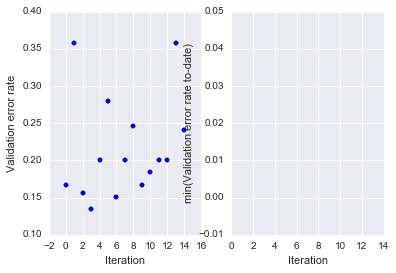

In [83]:
fit_iterator = estimator.fit_iter(train_x_arr,list(train_y_arr))
next(fit_iterator)
plot_helper = hpsklearn.demo_support.PlotHelper(estimator,
                                                mintodate_ylim=(-.01, .05))
while len(estimator.trials.trials) < estimator.max_evals:
    fit_iterator.send(1) # -- try one more model
    plot_helper.post_iter()
plot_helper.post_loop()

# -- Model selection was done on a subset of the training data.
# -- Now that we've picked a model, train on all training data.
estimator.retrain_best_model_on_full_data(train_x_arr, list(train_y_arr))

In [84]:
print('Best preprocessing pipeline:')
for pp in estimator._best_preprocs:
    print(pp)
#print()
print('Best classifier:\n', estimator._best_learner) 
test_predictions = estimator.predict(test_x_arr)
'''
acc_in_percent = 100 * np.mean(test_predictions == y_test)
print
print 'Prediction accuracy in generalization is %.1f%%' % acc_in_percent
'''

Best preprocessing pipeline:
StandardScaler(copy=True, with_mean=True, with_std=False)
Best classifier:
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.23275142688703584, n_estimators=66,
          random_state=2)


"\nacc_in_percent = 100 * np.mean(test_predictions == y_test)\nprint\nprint 'Prediction accuracy in generalization is %.1f%%' % acc_in_percent\n"

In [85]:
submission = pd.DataFrame({
        "PassengerId": Test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv(path+"hyper_submission_3.csv", index=False)